In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:
#Creating an array with outlier
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [5]:
#From that array creating DataFrames
df=pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [6]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


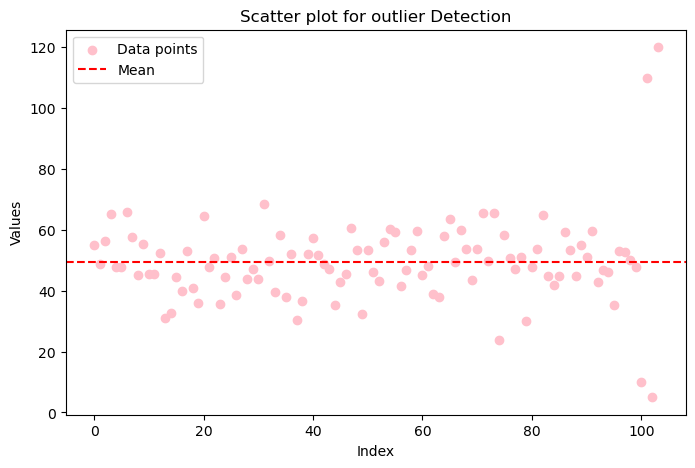

In [18]:
#Scatter Plot for outlier Detection
#Scatter plot helps to identify outliers
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='pink',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter plot for outlier Detection')
plt.legend()
plt.show()

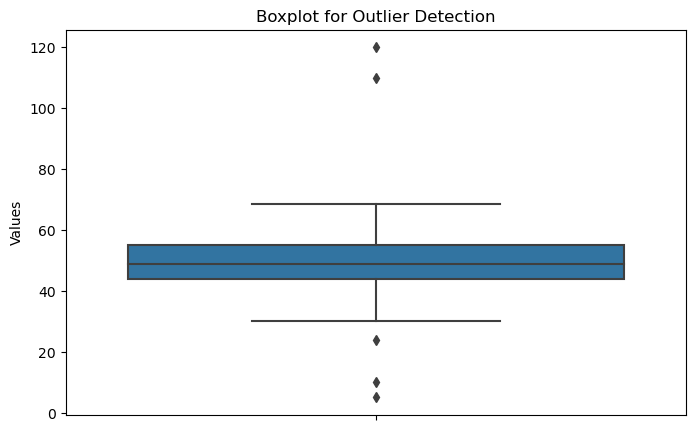

In [17]:
#Boxplot for Outlier Detection
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title('Boxplot for Outlier Detection')
plt.show()

# Z_Score Method:

z_score formula is:

z = (x-μ)/σ

x=Data point

μ=mean

σ=Standard Deviation

Steps:

1.Compute the Z-score for each data point.

2.If Z-score>3 or Z-score<-3,mark it as outlier

In [20]:
df['Z_score']=zscore(df['Values'])
df['Outlier_Z']=df['Z_score'].apply(lambda x: 'Outlier' if abs(x)>3 else 'Normal' )
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-score   Z_score Outlier_Z
101   110.0  4.328173  4.328173   Outlier
102     5.0 -3.175368 -3.175368   Outlier
103   120.0  5.042796  5.042796   Outlier


# InterQuartile Range(IQR) Method 
The IQR formula is:

IQR=Q3-Q1

steps:

1.Calculate Q1(25th percentile) and Q3(75th percentile).

2.Compute IQR=Q3-Q1

3.Define lower & upper bounds:

  **Lower Bound=Q1-1.5xIQR**
        
  **Upper Bound=Q3+1.5xIQR**
        
4.Any value outside these bounds is an outlier.

In [21]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1

#Defining bounds
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#Identify Outliers
df['Outlier_IQR']=df['Values'].apply(lambda x:'Outlier' if (x<lower_bound or x>upper_bound) else 'Normal')

print(df[df['Outlier_IQR']=='Outlier'])

         Values   Z-score   Z_score Outlier_Z Outlier_IQR
74    23.802549 -1.831694 -1.831694    Normal     Outlier
100   10.000000 -2.818056 -2.818056    Normal     Outlier
101  110.000000  4.328173  4.328173   Outlier     Outlier
102    5.000000 -3.175368 -3.175368   Outlier     Outlier
103  120.000000  5.042796  5.042796   Outlier     Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]   is considered an outlier.

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [24]:
#Step1 :Create a dataset
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

#Step2:Compute the 5-number summary
Q1= np.percentile(data,25)
Q2= np.median(data)
Q3= np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)

#Step3:Compute IQR
IQR = Q3-Q1

#Step4:Compute Oulier Boundaries
lower_bound= Q1-1.5*IQR
upper_bound=Q3+1.5*IQR


#Step5:Find Outliers
outliers= data[(data<lower_bound) | (data>upper_bound)]

#Step6:Print Results
print(f'5-Number Summary:\nMin:{min_value},Q1: {Q1},Median (Q2): {Q2}, Q3: {Q3},Max: {max_value}')
print(f'IQR: {IQR}')
print(f'Lower Bound:{lower_bound},Upper Bound:{upper_bound}')
print(f'Outliers: {outliers}')

5-Number Summary:
Min:5.0,Q1: 43.874401021766715,Median (Q2): 48.73043708220287, Q3: 55.00852473036764,Max: 120.0
IQR: 11.134123708600924
Lower Bound:27.17321545886533,Upper Bound:71.70971029326903
Outliers: [ 23.80254896  10.         110.           5.         120.        ]


# Balancing a Dataset with Downsampling

   Imagine we have a dataset for a binary classification task where the class labels are imbalanced, and we want to downsample the majority class to balance the dataset. 

In [26]:
import pandas as pd
from sklearn.utils import resample

df=pd.DataFrame({
    'Age':[22,25,27,28,30,35,40,45,50,55,60,65,70],
    'Income':[2000,2500,2700,3200,3500,3800,4000,4200,4300,4500,5000,5500,6000],
    'Class':['High','Low','Low','High','High','Low','High','High','Low','Low','High','High','Low']
})
df

,Age,Income,Class
0,22,2000,High
1,25,2500,Low
2,27,2700,Low
3,28,3200,High
4,30,3500,High
5,35,3800,Low
6,40,4000,High
7,45,4200,High
8,50,4300,Low
9,55,4500,Low


In [32]:
#Separate majority and minority classes
df_high=df[df['Class']=='High']
df_low=df[df['Class']=='Low']

In [33]:
#Downsample majority class
df_high_downsampled=resample(df_high,replace=False,n_samples=len(df_low),random_state=42)

In [34]:
#Combine downsampled majority with minority class
df_balanced=pd.concat([df_high_downsampled,df_low])

In [36]:
df_balanced['Class'].value_counts()

Class
High    6
Low     6
Name: count, dtype: int64

# UPSAMPLING

In [46]:
#Upsampling low class
df_low_upsampled=resample(df_low,replace=True,n_samples=len(df_high),random_state=42)
df_balanced=pd.concat([df_low_upsampled,df_high])
print(df_balanced['Class'].value_counts())
df_balanced

Class
Low     7
High    7
Name: count, dtype: int64


,Age,Income,Class
8,50,4300,Low
9,55,4500,Low
5,35,3800,Low
9,55,4500,Low
9,55,4500,Low
2,27,2700,Low
5,35,3800,Low
0,22,2000,High
3,28,3200,High
4,30,3500,High


1.SMOTE(SYNTHETIC MINORITY OVER-SAMPLING TECHNIQUE) to generate synthetic samples instead of duplicating existing ones.

2.Convert Categorical class labels into numeric form for SMOTE to work.

3.Apply SMOTE to balance the dataset.

4.Convert back to original categorical labels.

5.Combine the resampled data into final balanced dataset.

In [50]:
!pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata


In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [63]:
!pip uninstall scikit-learn imbalanced-learn -y



Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0


In [64]:
pip install -U scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE

df=pd.DataFrame({
    'Age':[22,25,27,28,30,35,40,45,50,55,60,65,70],
    'Income':[2000,2500,2700,3200,3500,3800,4000,4200,4300,4500,5000,5500,6000],
    'Class':['Minority','Majority','Majority','Majority','Majority','Minority','Minority','Minority','Majority','Majority','Majority','Majority','Majority']
})
df['Class']=df['Class'].map({'Majority':0,'Minority':1})

x=df[['Age','Income']]
y=df['Class']

#Apply SMOTE with k_neighbors=3 (reducing from default 5)
smote=SMOTE(sampling_strategy='auto',random_state=42,k_neighbors=3)
x_resampled,y_resampled=smote.fit_resample(x,y)

#Convert numeric labels back to categorical
y_resampled=y_resampled.map({0:'Majority',1:'Minority'})

#Combine the resampled dataset
df_balanced=pd.concat([pd.DataFrame(x_resampled,columns=['Age','Income']),pd.DataFrame(y_resampled,columns=['Class'])],axis=1)

print(df_balanced['Class'].value_counts())

print(df_balanced)

Class
Minority    9
Majority    9
Name: count, dtype: int64
    Age  Income     Class
0    22    2000  Minority
1    25    2500  Majority
2    27    2700  Majority
3    28    3200  Majority
4    30    3500  Majority
5    35    3800  Minority
6    40    4000  Minority
7    45    4200  Minority
8    50    4300  Majority
9    55    4500  Majority
10   60    5000  Majority
11   65    5500  Majority
12   70    6000  Majority
13   40    4031  Minority
14   35    3831  Minority
15   44    4176  Minority
16   35    3826  Minority
17   41    4040  Minority
